In [1]:
# https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html
# https:/download.pytorch.org/tutorial/data.zip
from io import open
import glob
import os

In [2]:
print(glob.glob('data/names/*.txt'))

['data/names/Czech.txt', 'data/names/German.txt', 'data/names/Arabic.txt', 'data/names/Japanese.txt', 'data/names/Chinese.txt', 'data/names/Vietnamese.txt', 'data/names/Russian.txt', 'data/names/French.txt', 'data/names/Irish.txt', 'data/names/English.txt', 'data/names/Spanish.txt', 'data/names/Greek.txt', 'data/names/Italian.txt', 'data/names/Portuguese.txt', 'data/names/Scottish.txt', 'data/names/Dutch.txt', 'data/names/Korean.txt', 'data/names/Polish.txt']


In [4]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [5]:
language_names = {}

all_languages = []

In [6]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != "Mn"
        and c in all_letters
    )

In [7]:
print(unicodeToAscii('Emile'))

Emile


In [8]:
def findFiles(path):
    return glob.glob(path)

In [11]:
total_names = 0

for filename in findFiles('data/names/*.txt'):
    language = os.path.splitext(os.path.basename(filename))[0]
    all_languages.append(language)
    read_names = open(filename, encoding='utf-8').read().strip().split('\n')
    names = [unicodeToAscii(line) for line in read_names]
    language_names[language] = names
    total_names += len(names)

In [12]:
all_languages

['Czech',
 'Czech',
 'German',
 'Arabic',
 'Japanese',
 'Chinese',
 'Vietnamese',
 'Russian',
 'French',
 'Irish',
 'English',
 'Spanish',
 'Greek',
 'Italian',
 'Portuguese',
 'Scottish',
 'Dutch',
 'Korean',
 'Polish']

In [13]:
n_languages = len(all_languages)
n_languages

19

In [14]:
total_names

20074

In [15]:
print(language_names['Czech'][:5])

['Abl', 'Adsit', 'Ajdrna', 'Alt', 'Antonowitsch']


In [16]:
import torch

In [19]:
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][all_letters.find(letter)] = 1
    return tensor

In [20]:
print(letterToTensor('a'))

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [21]:
def nameToTensor(name):
    tensor = torch.zeros(len(name), 1, n_letters)
    
    for li, letter in enumerate(name):
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

In [23]:
paul_tensor = nameToTensor('Paul')
paul_tensor.size()

torch.Size([4, 1, 57])

In [24]:
paul_tensor

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [46]:
import torch.nn as nn

class RNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [47]:
n_hidden =256
rnn = RNN(n_letters, n_hidden, n_languages)

In [48]:
inp = letterToTensor('C')
hidden = torch.zeros(1, n_hidden)
output, next_hidden = rnn(inp, hidden)

print(f'output size = {output.size()}')
print(f'next_hidden size = {next_hidden.size()}')

output size = torch.Size([1, 19])
next_hidden size = torch.Size([1, 256])


In [49]:
inp = nameToTensor('Charron')
hidden = torch.zeros(1, n_hidden)
output, next_hidden = rnn(inp[0], hidden)

In [50]:
print(output)

tensor([[-2.9449, -2.9219, -3.0048, -2.8793, -3.0453, -2.9811, -2.9165, -2.8668,
         -2.9682, -2.9305, -2.9682, -2.9070, -2.9856, -2.9898, -2.9459, -2.9113,
         -2.9284, -2.9095, -2.9571]], grad_fn=<LogSoftmaxBackward>)


In [51]:
def languageFromOutput(output):
    _, top_i = output.topk(1)
    language_i = top_i[0].item()
    return all_languages[language_i], language_i

In [52]:
print(languageFromOutput(output))

('Russian', 7)


In [53]:
import random

def randomTrainingExample():
    random_language_index = random.randint(0, n_languages -1)
    language = all_languages[random_language_index]
    
    random_language_names = language_names[language]
    
    name = random_language_names[random.randint(0, len(random_language_names) - 1)]
    
    language_tensor = torch.tensor([all_languages.index(language)], dtype=torch.long)
    name_tensor = nameToTensor(name)
    
    return language, name, language_tensor, name_tensor

In [54]:
for i in range(10):
    language, name, language_tensor, name_tensor = randomTrainingExample()
    
    print(f'language = {language} name = {name}')

language = German name = Laberenz
language = Dutch name = Romijnders
language = Scottish name = Wright
language = Portuguese name = Castro
language = Dutch name = Rooiakker
language = German name = Wegener
language = Irish name = O'Gorman
language = Czech name = Zimola
language = Japanese name = Uno
language = German name = Muhlfeld


In [55]:
criterion = nn.NLLLoss()
learning_rate = 0.005

In [56]:
def train(language_tensor, name_tensor):
    
    hidden = rnn.initHidden()
    
    rnn.zero_grad()
    
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)
        
    loss = criterion(output, language_tensor)
    loss.backward()
    
    # Our own optimizer
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)
        
    return output, loss.item()

In [57]:
n_iters = 200000

current_loss = 0
all_losses = []

In [58]:
for epoch in range(1, n_iters + 1):
    language, name, language_tensor, name_tensor = randomTrainingExample()
    
    output, loss = train(language_tensor, name_tensor)
    current_loss = loss
    
    if epoch % 5000 == 0:
        guess, guess_i = languageFromOutput(output)
        correct = 'Y' if guess == language else f'N {language}'
        
        print(f'{epoch} {epoch/ n_iters *100} {loss} {name} {guess} {correct}')
        
    if epoch % 1000 ==0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

5000 2.5 2.629338264465332 Leitner Czech N German
10000 5.0 1.1015803813934326 Suk Chinese N Korean
15000 7.5 1.2365177869796753 Fakhoury Arabic Y
20000 10.0 2.0941989421844482 Fonseca Czech N Spanish
25000 12.5 3.7629408836364746 Danks Czech N English
30000 15.0 3.764280319213867 Ratcliffe Irish N English
35000 17.5 1.1210227012634277 Sung Chinese N Korean
40000 20.0 1.8127013444900513 Cham Chinese N Arabic
45000 22.5 1.4021193981170654 Dubicki Czech N Polish
50000 25.0 0.4621902406215668 Arechavaleta Spanish Y
55000 27.500000000000004 0.9132371544837952 Haddad Arabic Y
60000 30.0 0.4276140034198761 De la cruz Spanish Y
65000 32.5 0.0822729542851448 Bencivenni Italian Y
70000 35.0 2.2925469875335693 Meeuwsen Scottish N Dutch
75000 37.5 0.22956666350364685 Schneiders Dutch Y
80000 40.0 1.8569024801254272 Matos Greek N Portuguese
85000 42.5 0.8234105110168457 An Vietnamese Y
90000 45.0 0.17800945043563843 Acquati Italian Y
95000 47.5 2.012424945831299 Holding Czech N English
100000 50.0

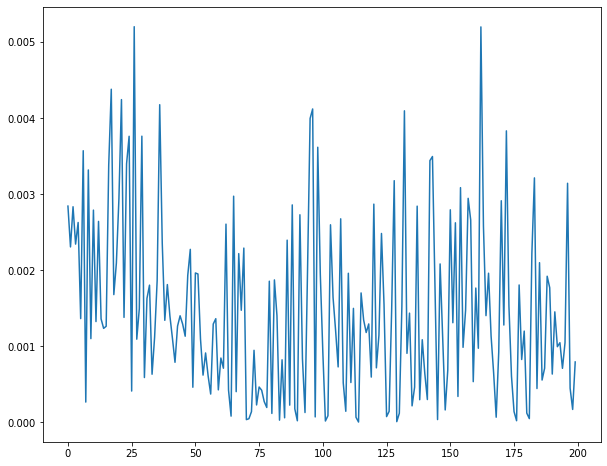

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(all_losses)
plt.show()

In [61]:
n_prediction = 3

In [89]:
input_name = 'Bruce'

In [90]:
with torch.no_grad():
    
    name_tensor = nameToTensor(input_name)
    
    hidden = rnn.initHidden()
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)
        
    topv, topi = output.topk(n_prediction, 1, True)
    
    for i in range(n_prediction):
        
        value = topv[0][i].item()
        language_index = topi[0][i].item()
        
        print(f'{value} {all_languages[language_index]}')

-0.8555676341056824 Scottish
-1.3454396724700928 German
-1.88555908203125 English
